[Creating Date-Partitioned Tables in BigQuery](https://www.cloudskillsboost.google/focuses/3694?parent=catalog)

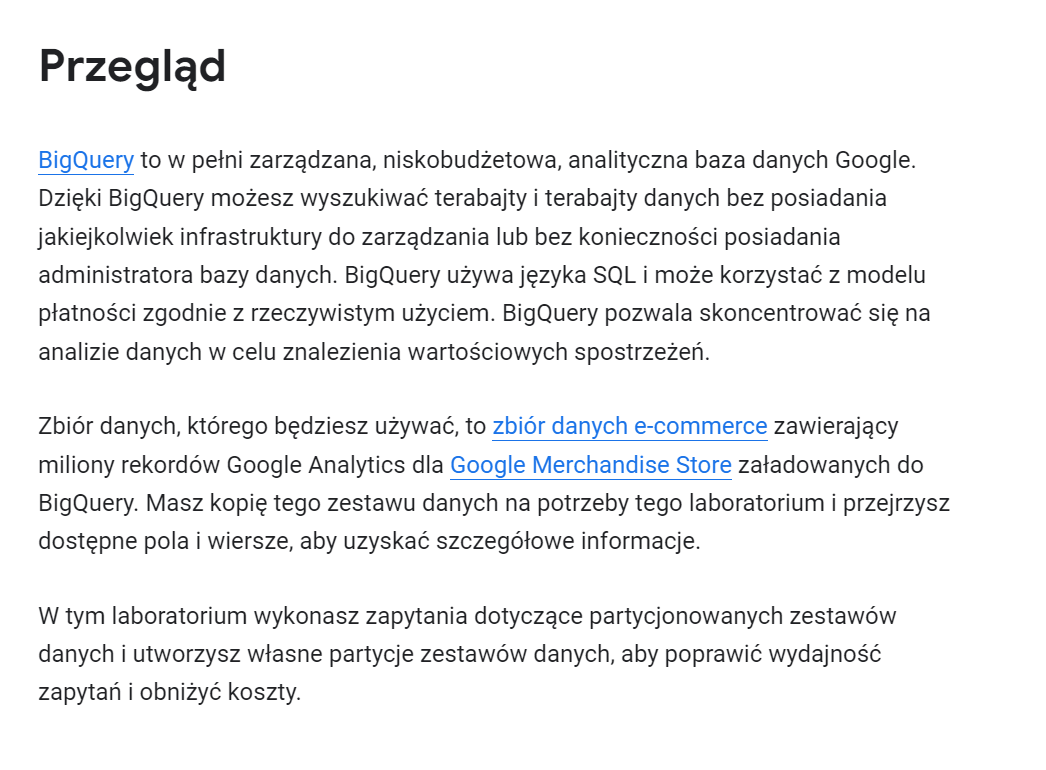

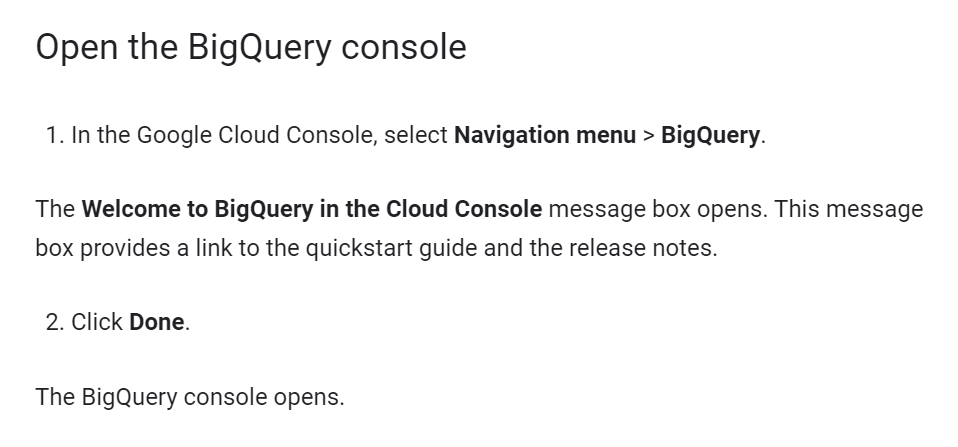

In [ ]:
#  ecommerce

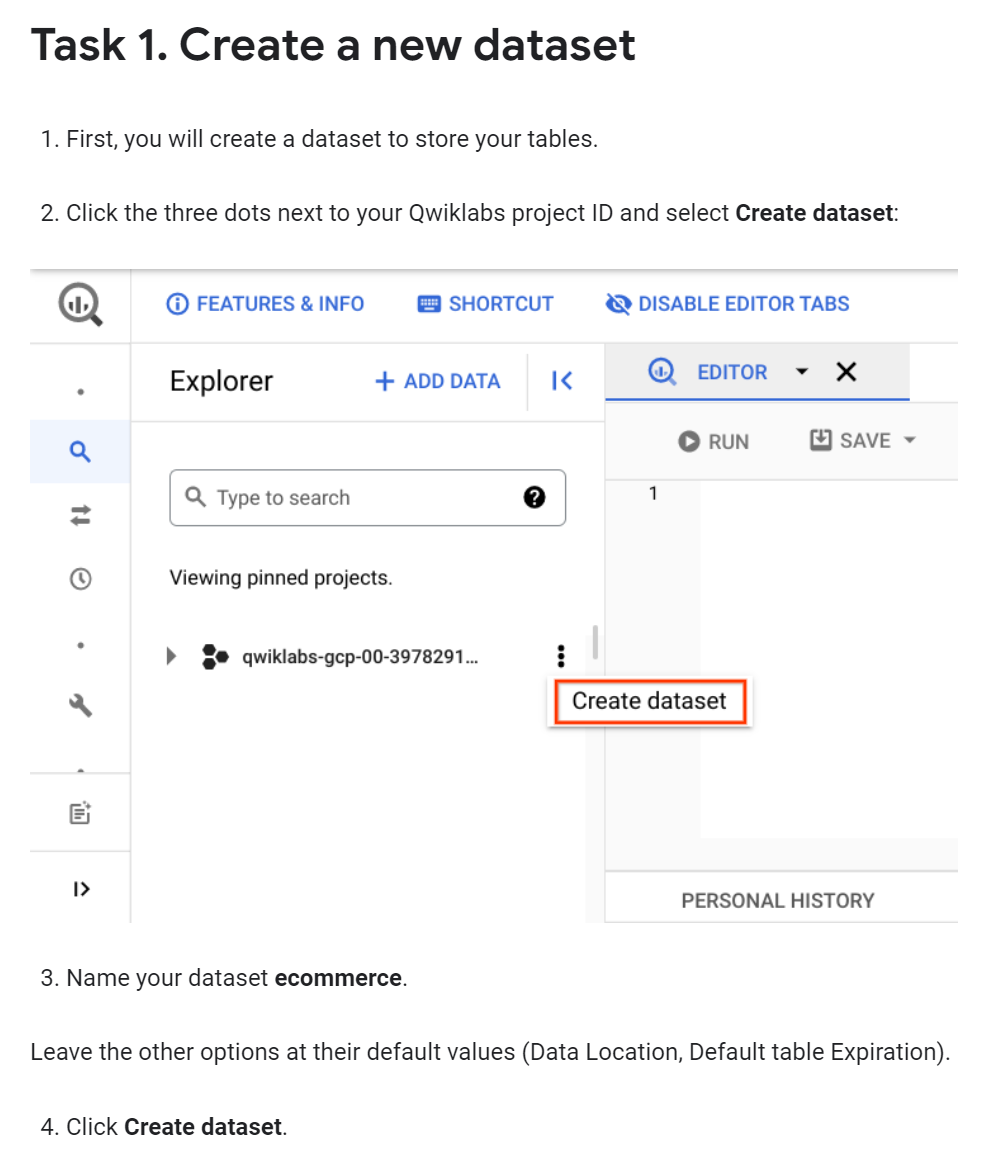

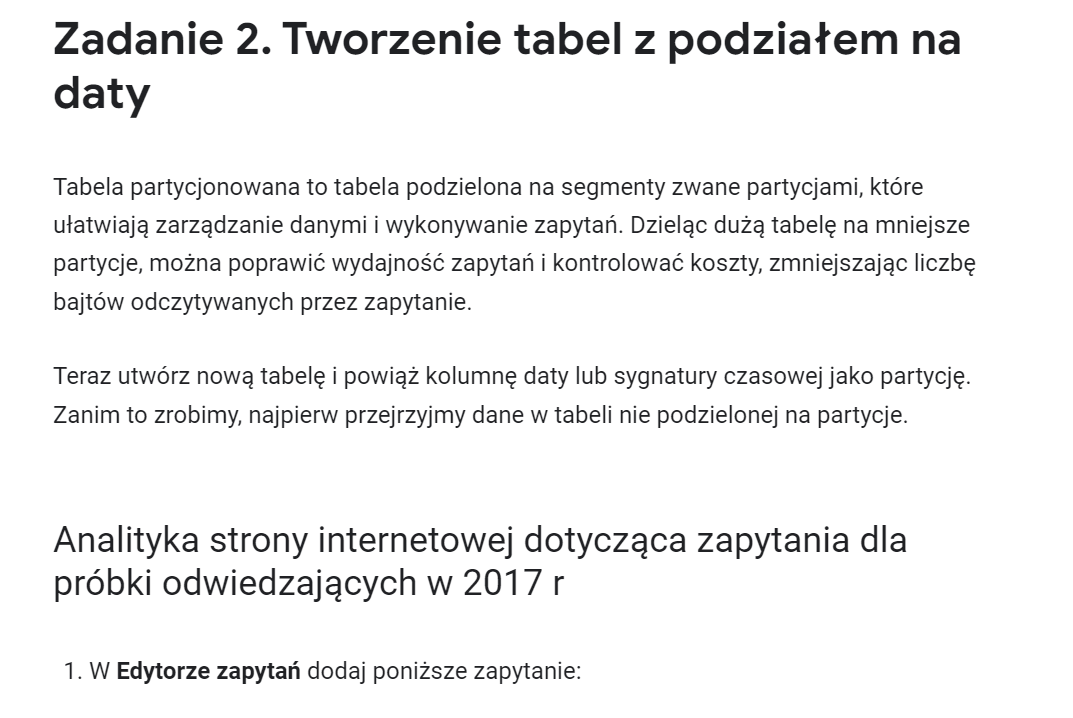

In [ ]:
%%bigquery

#standardSQL
SELECT DISTINCT
  fullVisitorId,
  date,
  city,
  pageTitle
FROM `data-to-insights.ecommerce.all_sessions_raw`
WHERE date = '20170708'
LIMIT 5

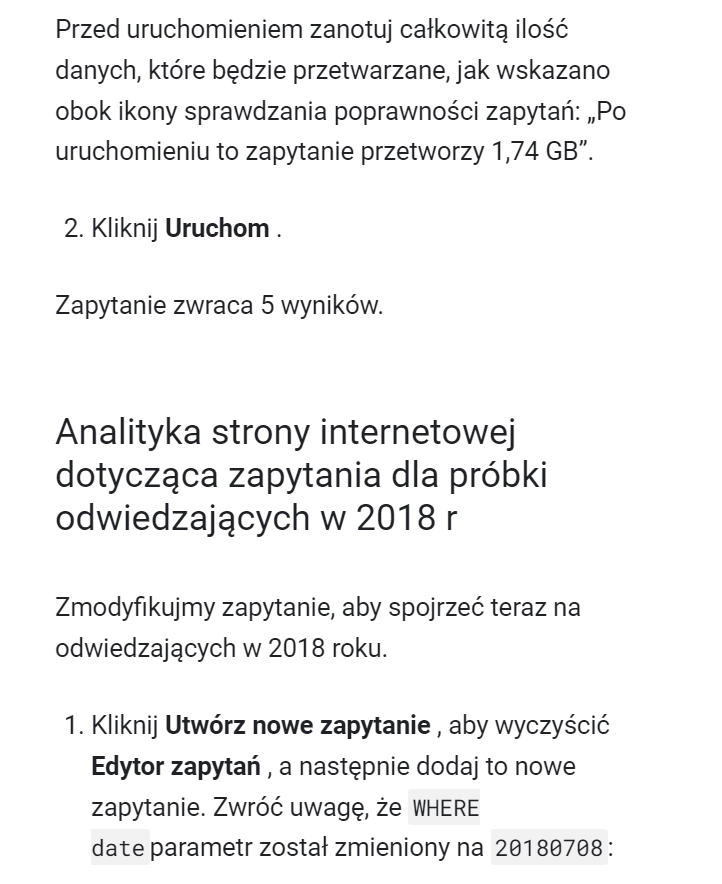

In [ ]:
%%bigquery

#standardSQL
SELECT DISTINCT
  fullVisitorId,
  date,
  city,
  pageTitle
FROM `data-to-insights.ecommerce.all_sessions_raw`
WHERE date = '20180708'
LIMIT 5

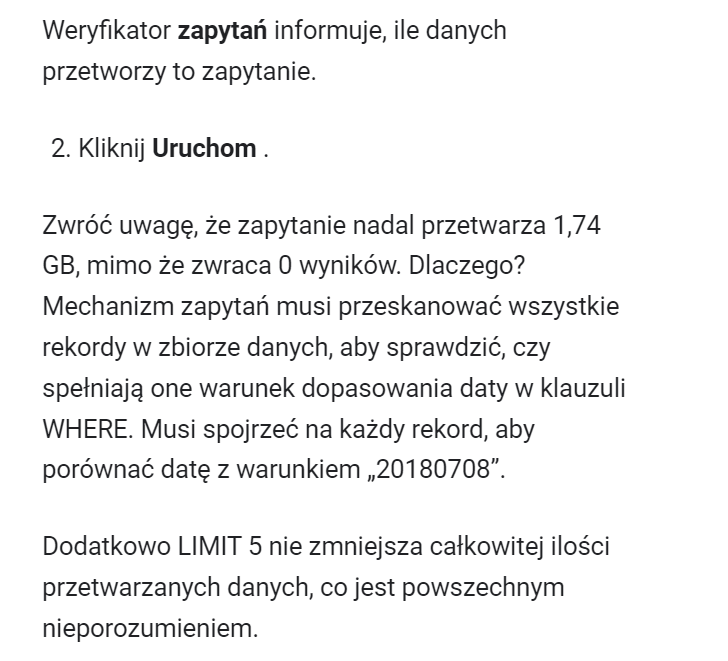

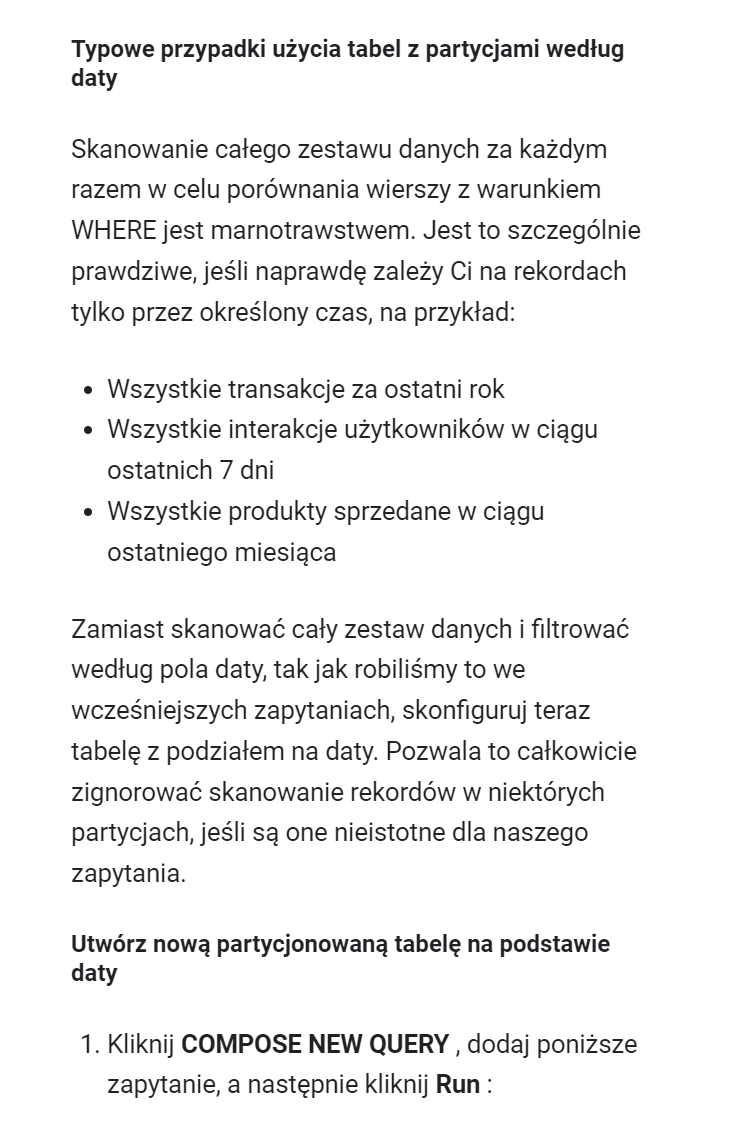

In [ ]:
%%bigquery

#standardSQL
 CREATE OR REPLACE TABLE ecommerce.partition_by_day
 PARTITION BY date_formatted
 OPTIONS(
   description="a table partitioned by date"
 ) AS
 SELECT DISTINCT
 PARSE_DATE("%Y%m%d", date) AS date_formatted,
 fullvisitorId
 FROM `data-to-insights.ecommerce.all_sessions_raw`

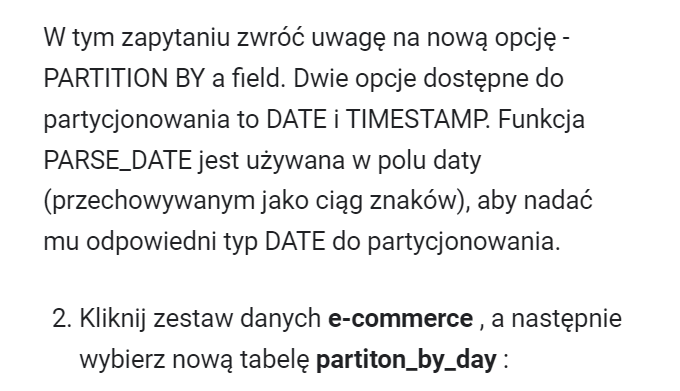

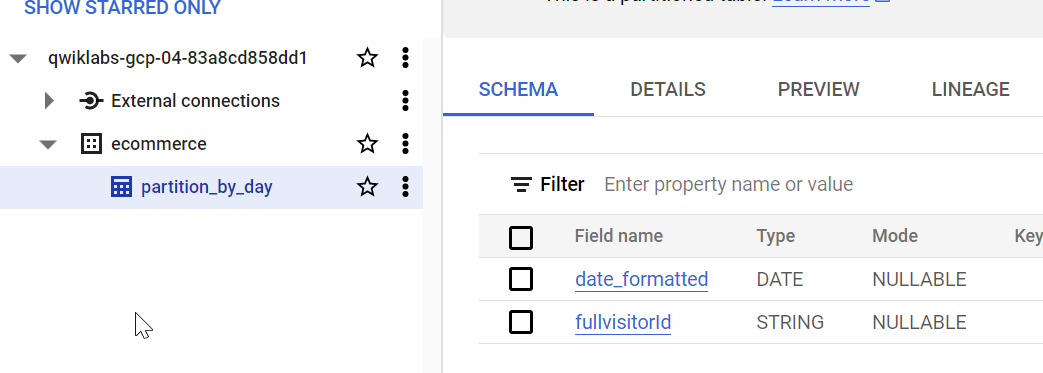

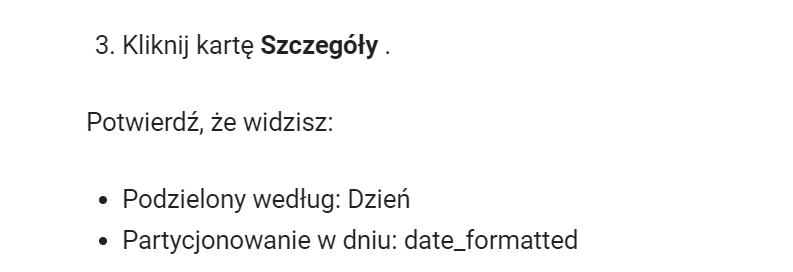

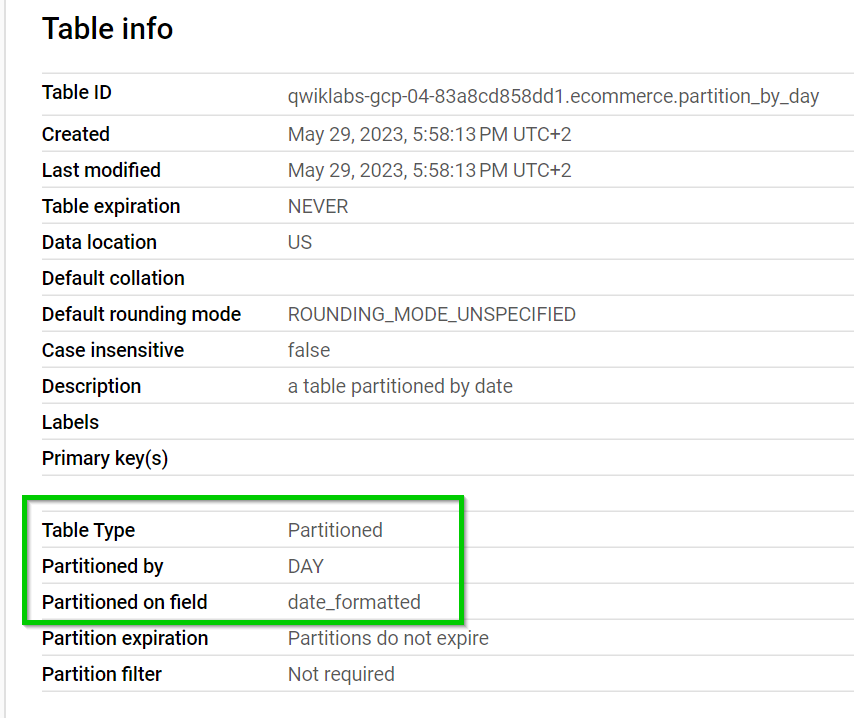

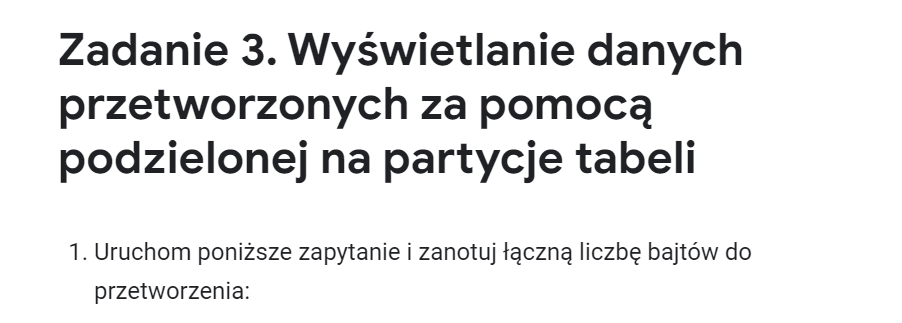

In [ ]:
%%bigquery

#standardSQL
SELECT *
FROM `data-to-insights.ecommerce.partition_by_day`
WHERE date_formatted = '2016-08-01'

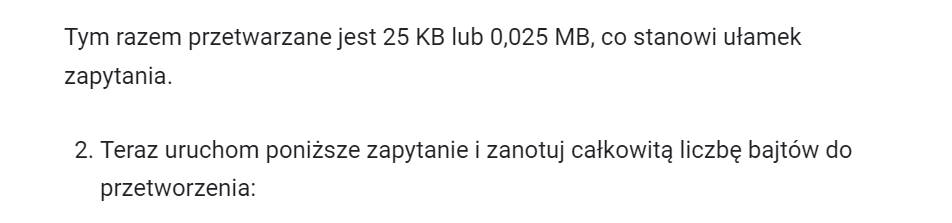

In [ ]:
%%bigquery

#standardSQL
SELECT *
FROM `data-to-insights.ecommerce.partition_by_day`
WHERE date_formatted = '2018-07-08'

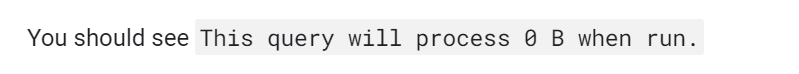

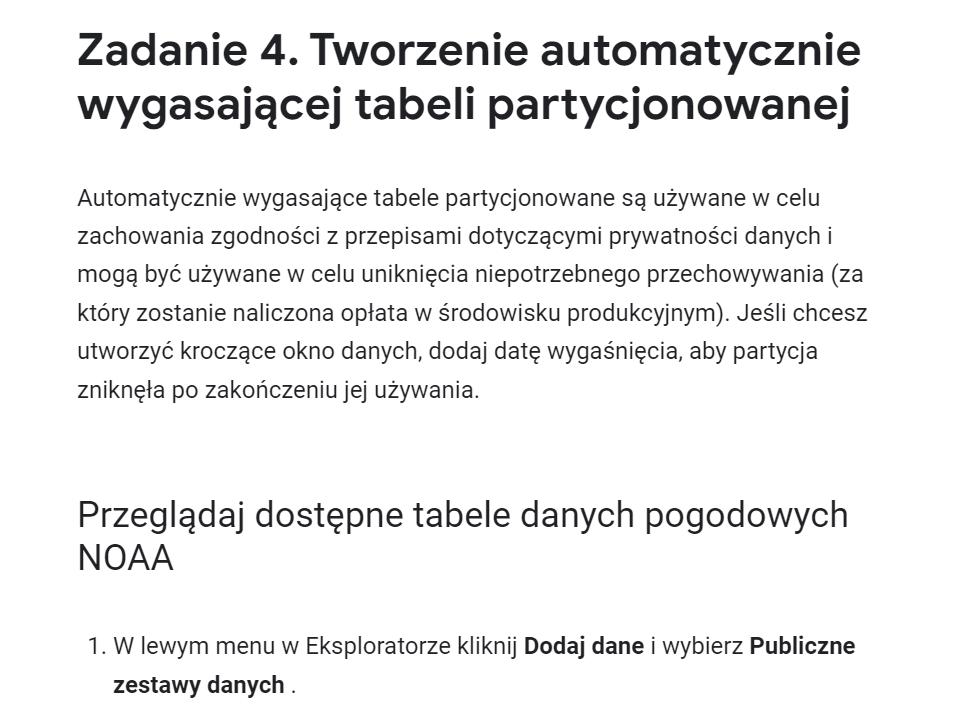

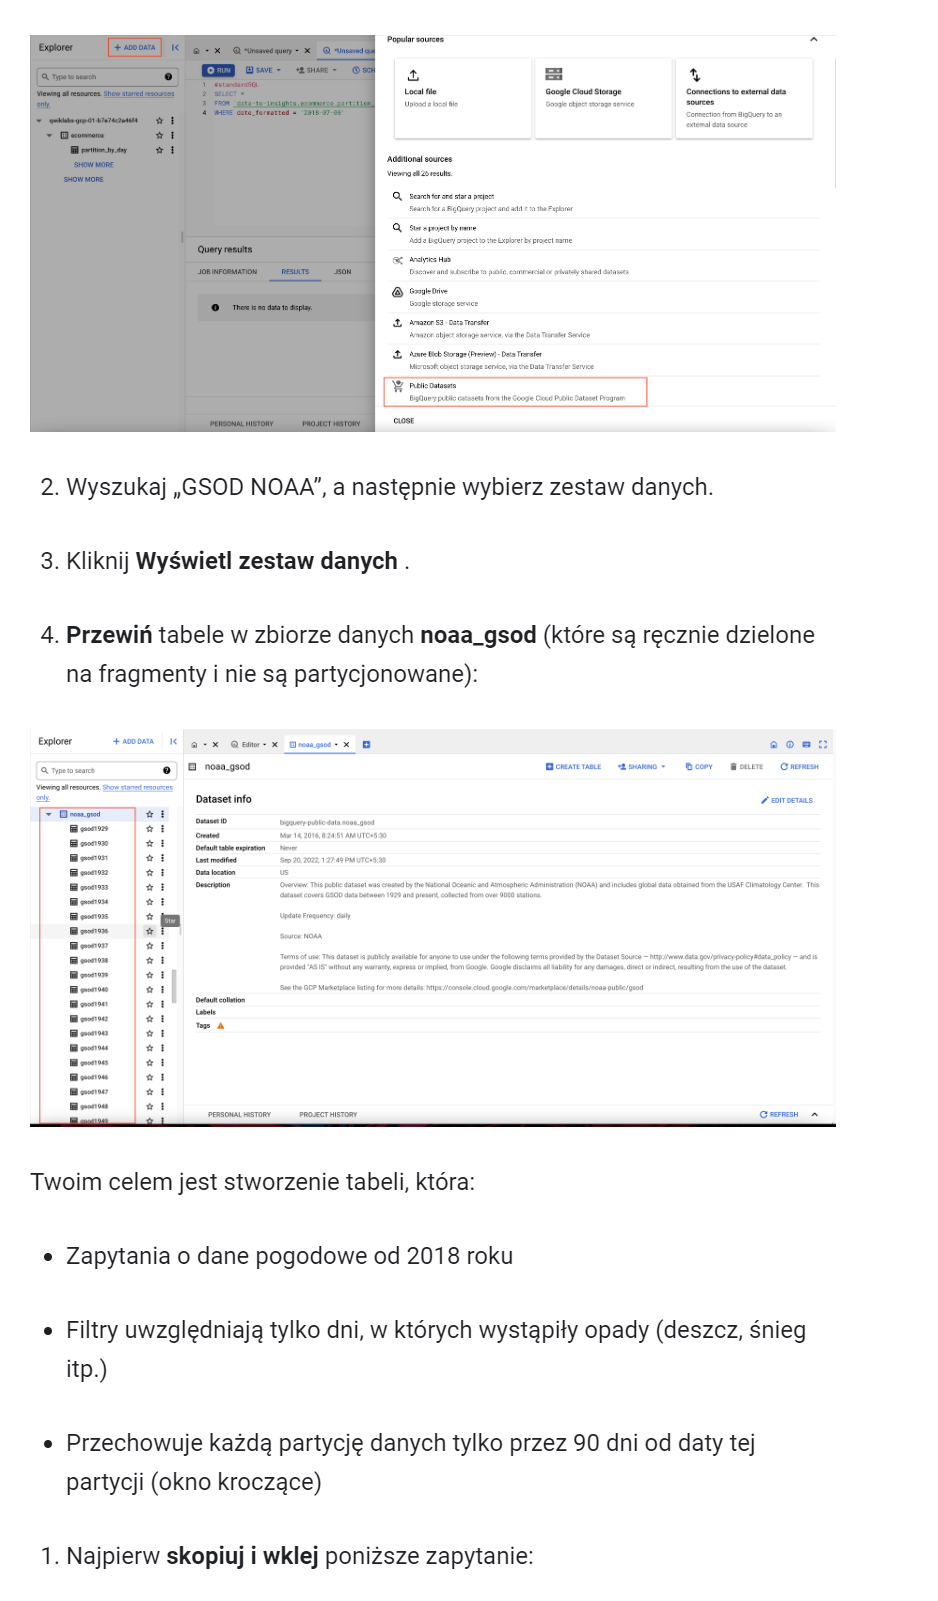

In [ ]:
%%bigquery

#standardSQL
 SELECT
   DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date,
   (SELECT ANY_VALUE(name) FROM `bigquery-public-data.noaa_gsod.stations` AS stations
    WHERE stations.usaf = stn) AS station_name,  -- Stations may have multiple names
   prcp
 FROM `bigquery-public-data.noaa_gsod.gsod*` AS weather
 WHERE prcp < 99.9  -- Filter unknown values
   AND prcp > 0      -- Filter stations/days with no precipitation
   AND _TABLE_SUFFIX >= '2018'
 ORDER BY date DESC -- Where has it rained/snowed recently
 LIMIT 10

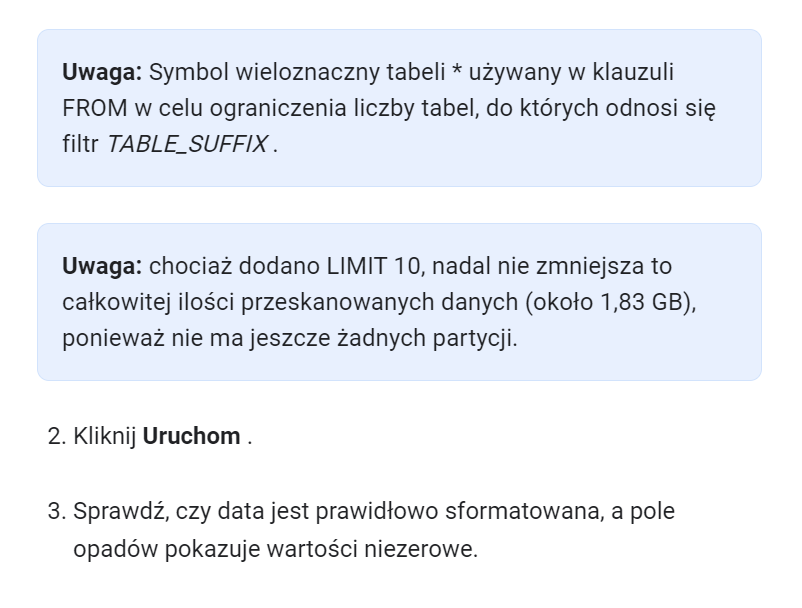

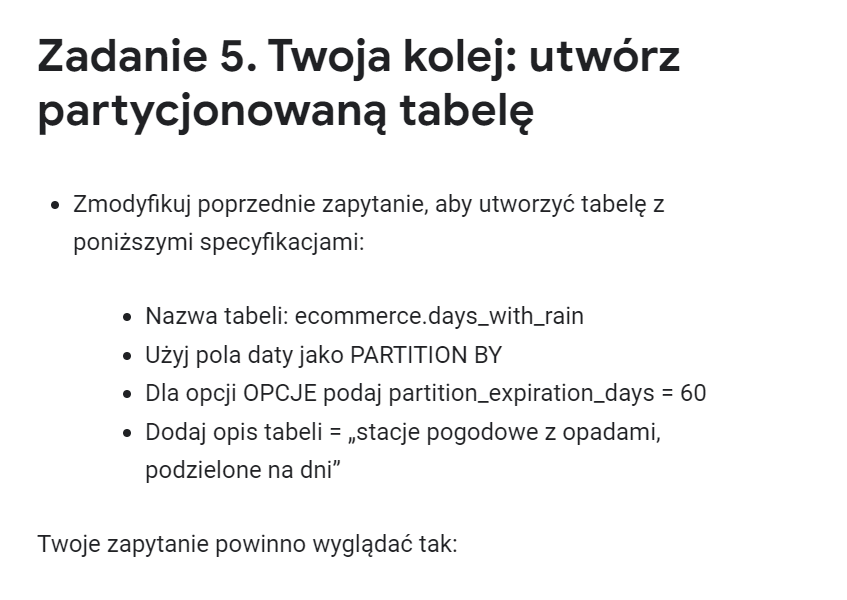

`partition_expiration_days=60`: Ustawia okres wygaśnięcia partycji na 60 dni, co oznacza, że dane starsze niż 60 dni zostaną automatycznie usunięte.

In [ ]:
%%bigquery

 CREATE OR REPLACE TABLE ecommerce.days_with_rain
 PARTITION BY date
 OPTIONS (
   partition_expiration_days=60,
   description="weather stations with precipitation, partitioned by day"
 ) AS
 SELECT
   DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date,
   (SELECT ANY_VALUE(name) FROM `bigquery-public-data.noaa_gsod.stations` AS stations
    WHERE stations.usaf = stn) AS station_name,  -- Stations may have multiple names
   prcp
 FROM `bigquery-public-data.noaa_gsod.gsod*` AS weather
 WHERE prcp < 99.9  -- Filter unknown values
   AND prcp > 0      -- Filter
   AND _TABLE_SUFFIX >= '2018'

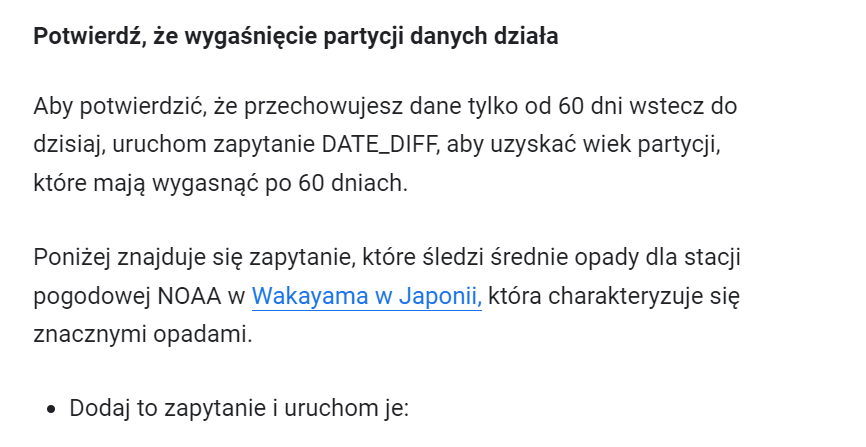

In [ ]:
%%bigquery

#standardSQL
# avg monthly precipitation
SELECT
  AVG(prcp) AS average,
  station_name,
  date,
  CURRENT_DATE() AS today,
  DATE_DIFF(CURRENT_DATE(), date, DAY) AS partition_age,
  EXTRACT(MONTH FROM date) AS month
FROM ecommerce.days_with_rain
WHERE station_name = 'WAKAYAMA' #Japan
GROUP BY station_name, date, today, month, partition_age
ORDER BY date DESC; # most recent days first

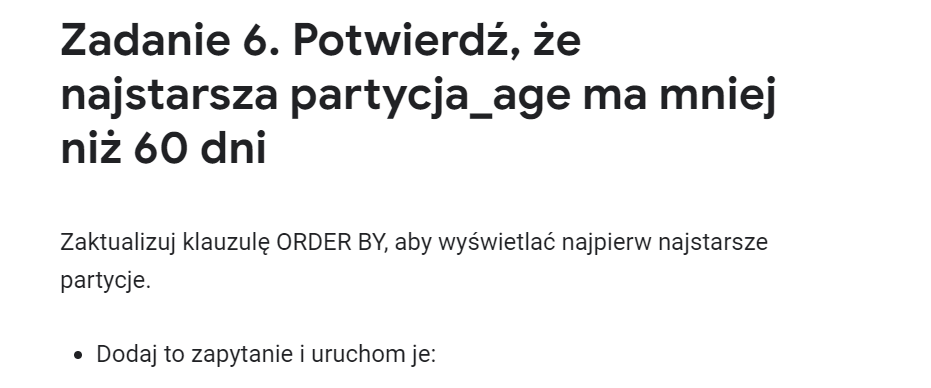

In [ ]:
%%bigquery

#standardSQL
# avg monthly precipitation
SELECT
  AVG(prcp) AS average,
  station_name,
  date,
  CURRENT_DATE() AS today,
  DATE_DIFF(CURRENT_DATE(), date, DAY) AS partition_age,
  EXTRACT(MONTH FROM date) AS month
FROM ecommerce.days_with_rain
WHERE station_name = 'WAKAYAMA' #Japan
GROUP BY station_name, date, today, month, partition_age
ORDER BY partition_age DESC

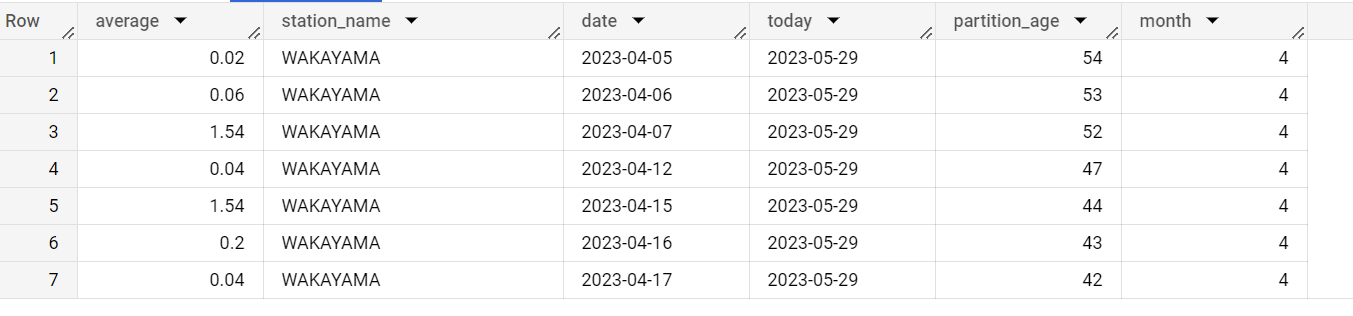